 <h1 align="center">SPOTIFY TOP 100 - DATA ANALYSIS </h1>

![title](https://i.scdn.co/image/ab6775700000ee85df2e5b46101b53c16a6e379d)

<b> Spotify Top 100</b>

Top 100 songs in 2018, based on Spotify streaming data, including name, artist and key attributes (danceability, energy, loudness, mode, speechiness, acousticness, etc)
Here I decided to analyse the data set following these axes : 

   - Which artists had the most Top 100 songs?

   - Are there more artists in the Top 100 with 'Lil' in their name, or with 'DJ' in their name?

   - Which song attributes are most strongly correlated? What attributes seem to have very little correlation?

   - Which attributes have the most variability? Which tend to be the most similar among the Top 100 songs?

<i>This dataset has been imported from Maven Analytics but the all the data organization, clearing , exploration and visualization are my own personnal work. </i>

### I am importing the necessary library to lead my analysis and visualization.

In [33]:
import mysql.connector 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### I have imported the data set from excel to mySQL workbench, and I am connecting to the data base through python to further use pandas and seaborn.

In [34]:
mydb = mysql.connector.connect(
    host= 'localhost',
    user='root',
    password='Benben123,',
    database='spotify_top_100'
)

mycursor = mydb.cursor()


### Which artists had the most Top 100 songs?  

In [35]:
request_top100_songs =  "SELECT  artists,  count(*) AS nb_top100_songs FROM top2018 GROUP BY 1 ORDER BY 2 DESC LIMIT 1;"

In [36]:
mycursor.execute(request_top100_songs)

In [37]:
result_top_100 = mycursor.fetchall()

In [38]:
result_top_100

[('XXXTENTACION', 6)]

#### XXXTENTACION is the most representated artist among the top 100 songs in 2018. 


### Are there more artists in the Top 100 with 'Lil' in their name, or with 'DJ' in their name? 

In [39]:
request_lil_or_dj= " SELECT \
COUNT(CASE WHEN artists LIKE '{}' THEN artists ELSE NULL END) AS lil_in_name, \
COUNT(CASE WHEN artists LIKE '{}' THEN artists ELSE NULL END) AS DJ_in_name \
FROM \
top2018;"

In [40]:
args = [('%'+'Lil'+'%'),'%DJ%']
args

['%Lil%', '%DJ%']

In [41]:
mycursor.execute(request_lil_or_dj.format(*args))

In [42]:
result_lil_or_dj= mycursor.fetchall()

In [43]:
result_lil_or_dj

[(3, 2)]

#### As we can see there are more artists with 'Lil' in their name than artists with 'DJ' in their name.

### Which song attributes are most strongly correlated? What attributes seem to have very little correlation?

Here to study the correlation I am going to create a Dataframe and then I will use the 'corr' function to analyze the correlation between the different attributes. Moreover I am going to visualize it through a heatmap which will be more explicit.

In [44]:
request_correlation = 'SELECT * FROM top2018;'

In [45]:
mycursor.execute(request_correlation)

In [46]:
result_correlation = mycursor.fetchall()

As we only retrieve the data when we fetch from the cursor I am going to use the description method and run through it to get the column titles.

In [47]:
header=[]

In [48]:
for element in mycursor.description:
    header.append(element[0])

In [49]:
df = pd.DataFrame(result_correlation,columns=header)

In [50]:
df_attributes = df.loc[:,'danceability':]

In [51]:
df_attributes_corr = df_attributes.corr(method='pearson')

In [52]:
mask = np.triu(df_attributes_corr,0)

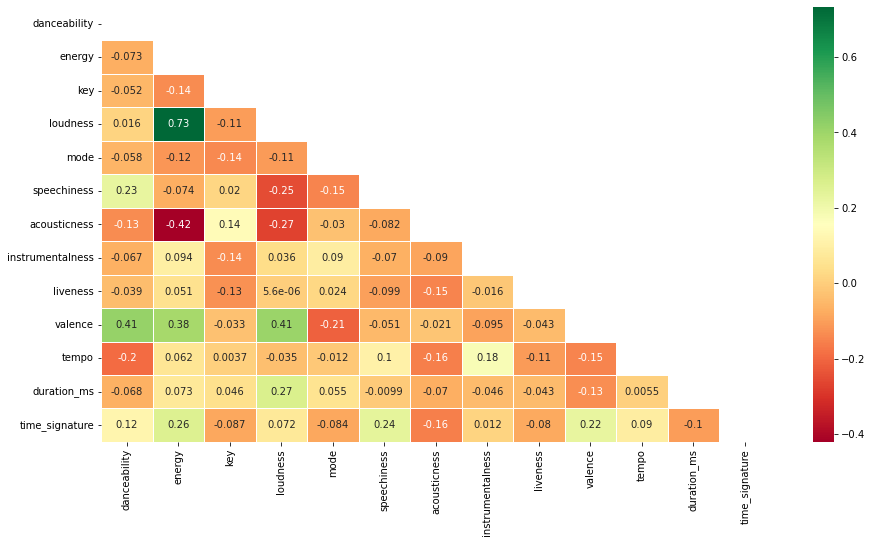

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(df_attributes_corr,mask=mask,linewidths=1,cmap='RdYlGn',annot=True)
plt.show()

#### The most correlated attributes according to pearson correlation are loudness and energy , then we'll find the valence/danceability and valence/loudness couples followed closely by valence/energy.

#### The least correlated attributes are acousticness/energy, loudness/acousticness and speechiness/loudness.

### Which attributes have the most variability? Which tend to be the most similar among the Top 100 songs? 

To study the variability of an attributes I will compare their range, their mean, standard deviation and their variance, I will use the same df to obtain these informations.

In [54]:
df_attributes.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [63]:
df_attributes

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.684,0.619,10,-7.005,1,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,0.638,0.658,3,-6.318,1,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,0.552,0.760,0,-4.706,1,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,0.258,0.437,11,-6.593,0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0


I think it could be a great idea to normalize every columns to obtain comparable value and then study the variability of each components side by side.

In [167]:
df_attributes_agg = df_attributes.agg(['mean','std','var'])

In [168]:
df_normalized = (df_attributes_agg-df_attributes_agg.mean())/df_attributes_agg.std()

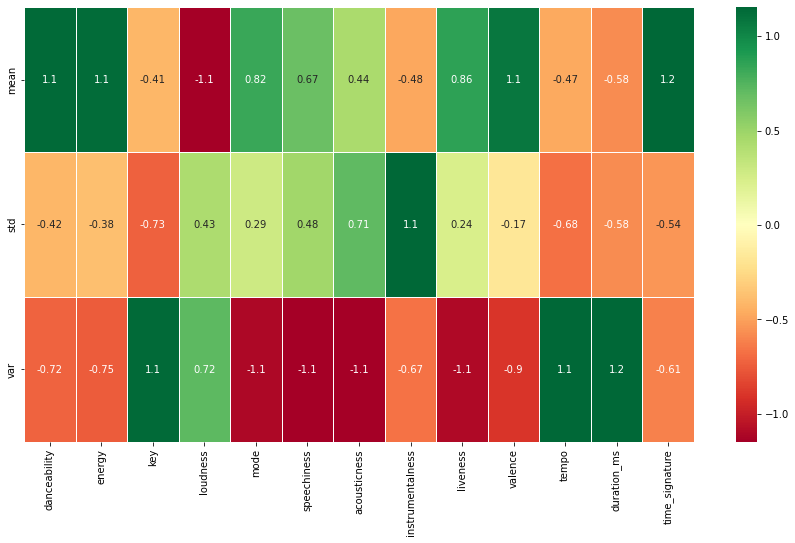

In [169]:
plt.figure(figsize=(15,8))
sns.heatmap(df_normalized,linewidths=1,cmap='RdYlGn',annot=True)
plt.show()

Every variables are now normalized, then I am going to refer to the standard deviation to measure the variability of the components. As we can see the instrumentalness is subject to high variability given its std score.

But when it comes to variance we can see that only a few components such instrumentalness, time_signature or loudness and danceability are not very important which mean, the value dispersion is not very important.

Valence, liveness and the mode are most likely the most similar in the top 100. 